#Overview
The notebook analyzes a dataset of comments from Wikipedia's talk page edits to build models capable of detecting different types of toxicity, including threats, obscenity, insults, and identity-based hate. The dataset is sourced from the Jigsaw Toxic Comment Classification Challenge on Kaggle.

The analysis involves the following steps:

Data Exploration: Examining the structure and content of the dataset, including descriptive statistics and visualizations to understand the distribution of toxic and non-toxic comments.

Label Frequency Analysis: Investigating the frequency of each toxicity label to identify potential class imbalances.

Correlation Analysis: Exploring the relationships between different toxicity labels using a cross-correlation matrix to determine if certain labels tend to co-occur.

Data Examples: Reviewing specific examples of toxic and non-toxic comments to gain a qualitative understanding of the data.

Word Cloud Visualization: Creating word clouds to visualize the most common words associated with each toxicity label, providing insights into the language patterns of toxic comments.


###Dependencies

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

##Analyzing the data

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_y = pd.read_csv("test_labels.csv")

In [ ]:
train.head() #first lines


id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [ ]:
train.tail() #last lines


id                                       comment_text  \
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0

In [ ]:
train.describe()


toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [ ]:
test.head()


id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [ ]:
test.tail()

id                                       comment_text
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

In [ ]:
test_y.head()


id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1

In [ ]:
train.shape


(159571, 8)

In [ ]:
test.shape


(153164, 2)

Training data contains 159,571 tweets with 8 columns  and the test data contains 153,164 tweets with 2 columns.


Label categories

<Axes: title={'center': 'Labels Frequency'}>

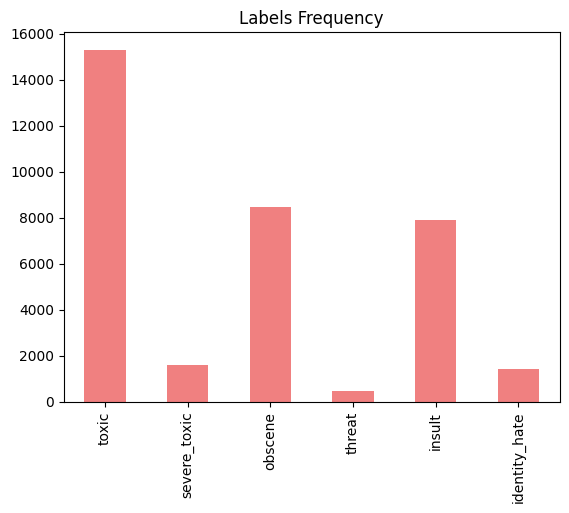

In [ ]:
# labels from the training data
train_labels = train[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()

label_count.plot(kind='bar', title='Labels Frequency', color='lightcoral')


We can see a significant class imbalance.



##Labeled data frequency

Label toxic has the most observations in the training dataset while threat has the least.   :


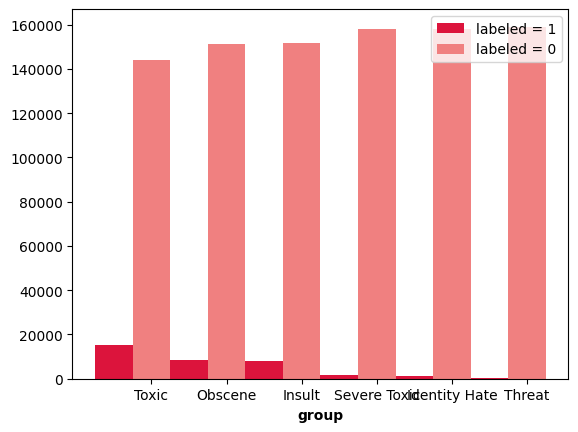

In [ ]:
# Code to draw bar graph for visualising distribution of classes within each label.
barWidth = 0.50

bars1 = [sum(train['toxic'] == 1), sum(train['obscene'] == 1), sum(train['insult'] == 1), sum(train['severe_toxic'] == 1),
         sum(train['identity_hate'] == 1), sum(train['threat'] == 1)]
bars2 = [sum(train['toxic'] == 0), sum(train['obscene'] == 0), sum(train['insult'] == 0), sum(train['severe_toxic'] == 0),
         sum(train['identity_hate'] == 0), sum(train['threat'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='crimson', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightcoral', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
plt.legend()
plt.show()

In [ ]:
for label in train_labels[2:]:
    print(train_labels[label].value_counts(), '\n') #these are the numbers:

toxic
0    144277
1     15294
Name: count, dtype: int64 

severe_toxic
0    157976
1      1595
Name: count, dtype: int64 

obscene
0    151122
1      8449
Name: count, dtype: int64 

threat
0    159093
1       478
Name: count, dtype: int64 

insult
0    151694
1      7877
Name: count, dtype: int64 

identity_hate
0    158166
1      1405
Name: count, dtype: int64 



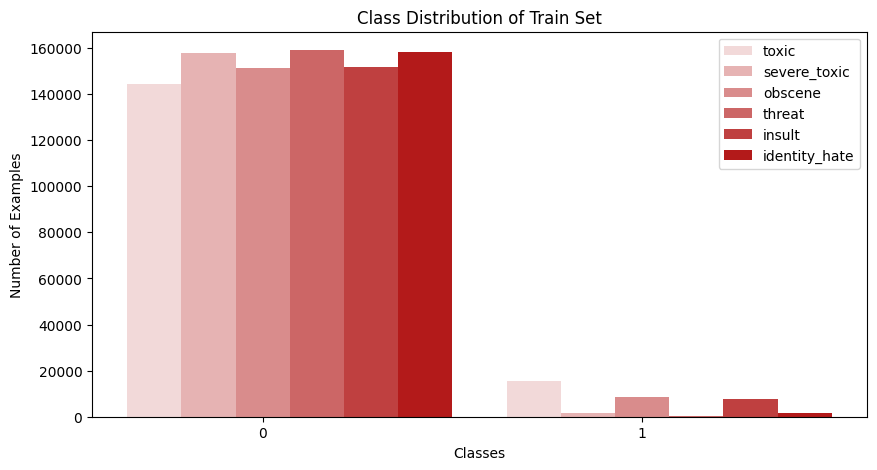

In [ ]:
# Get the class for each column
classes = []
for i in range(2, 8):
    # Use iloc to select columns by position
    classes.append(train_labels.iloc[:, i-2].value_counts())

# Create a combined bar chart
labels = classes[0].index
num_columns = len(classes)
width = 1 / (num_columns + 1)

fig, ax = plt.subplots(figsize=(10, 5))

# Define colors for the bars
colors = ['#f2d9d9', '#e6b3b3', '#d98c8c', '#cc6666', '#bf4040', '#b31a1a']  # Muted/deeper reds

for i, class_dist in enumerate(classes):
    x = np.arange(len(labels)) + (i + 1) * width
    # Use train_labels column names directly
    bars = ax.bar(x, class_dist, width, label=train_labels.columns[i], color=colors[i]) # colors

ax.set_ylabel('Number of Examples')
ax.set_xlabel('Classes')
ax.set_title('Class Distribution of Train Set')
ax.set_xticks(x - width * (num_columns / 2))
ax.set_xticklabels(labels)
ax.legend()

plt.show()

##Cross-correlation matrix

To see which labels are likely to appear together with a comment, if we look at the cross-correlation matrix, there is a high chance of obscene comments to be insulting.



<Axes: >

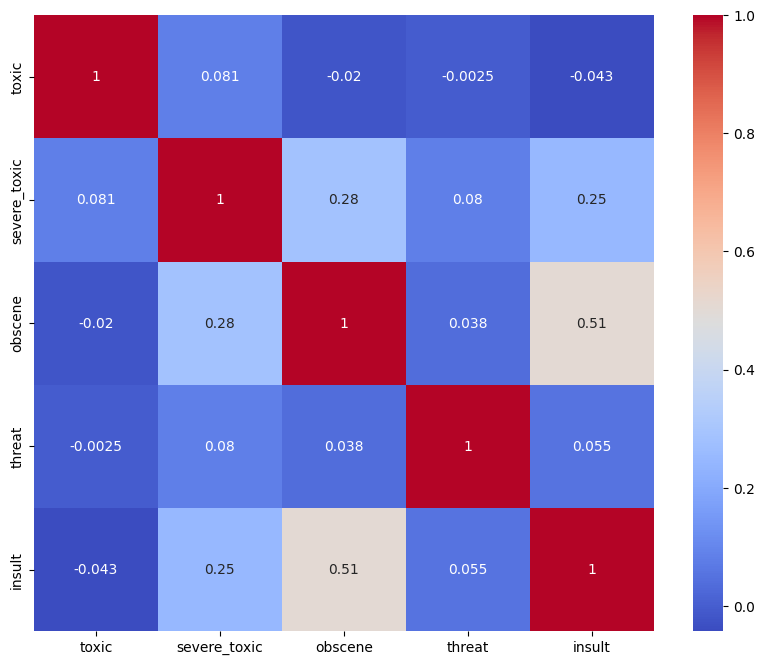

In [ ]:
# Cross correlation matrix across labels
rowsums = train.iloc[:, 2:].sum(axis=1)
temp = train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="coolwarm")

##Data examples

Below are examples of one non-toxic comment and toxic comment.

In [ ]:
train[train.toxic == 1].iloc[10000, 1] #example numero 10000 -one zero deleted as there is less toxic than non toxic


"Hi ya buddy \nLook, don't be a butt humper.  Are you bendover buddies with Hale or something?  What the hell is wrong with mocking a piece of dog shit like that?"

In [ ]:
train.comment_text[100000] #example numero 100000

"I think she meets Notability guidelines and thanks for creating the page for her. She was a big icon in the pageant drag community and in the drag/gay community in general. Her death has been covered by several 'mainstream' media outlets."

##Wordcloud

To get an idea we can visualize a wordcloud of what are most common words contributing to different classes:

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
def Word_Cloud(token):
    """
    Visualize the most common words contributing to the token.
    """
    threat_context = train[train[token] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="coolwarm"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words assosiated with the token {token} ", size=20)
    plt.show()

class severe toxic:

Choose a class : severe_toxic


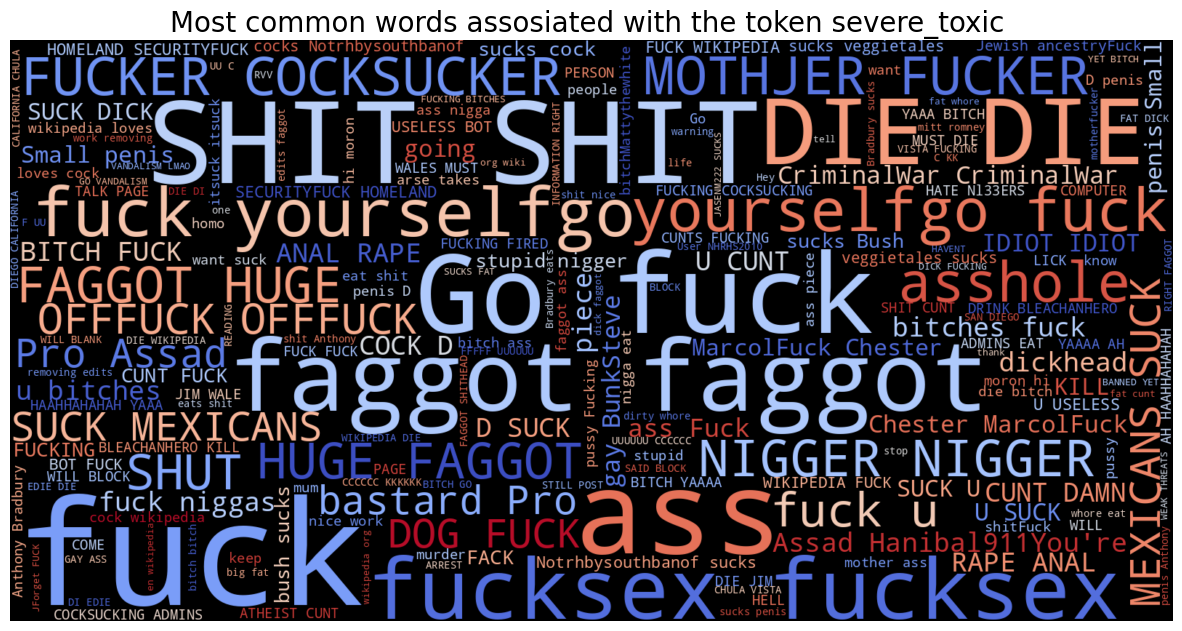

In [ ]:
# enter the label name. > severe_toxic
token = input(
    'Choose a class : ')
Word_Cloud(token.lower())

class toxic:

Choose a class : toxic


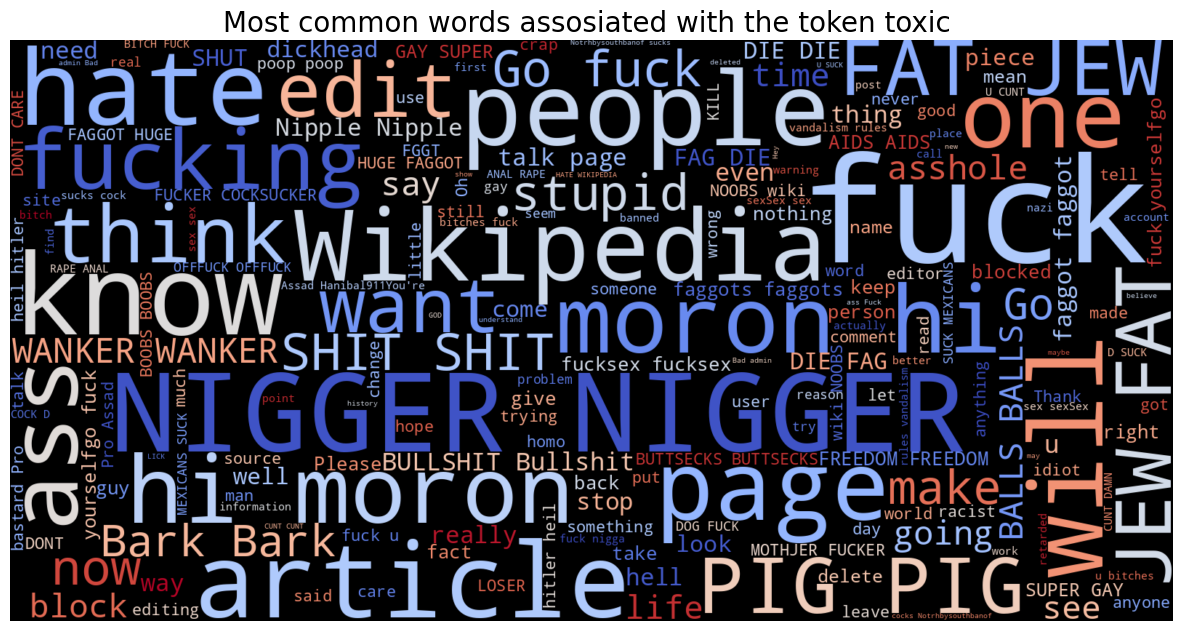

In [ ]:
# enter the label name. > toxic
token = input(
    'Choose a class : ')
Word_Cloud(token.lower())

obscene:

Choose a class : obscene


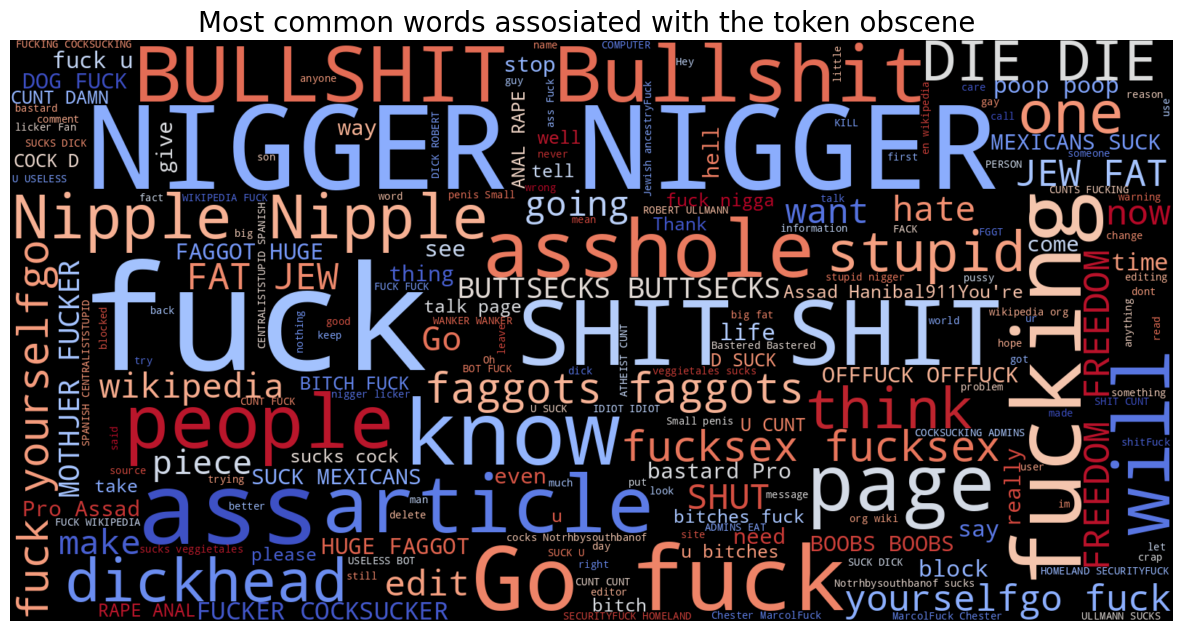

In [ ]:
# enter the label name. > obscene
token = input(
    'Choose a class : ')
Word_Cloud(token.lower())

Choose a class : threat


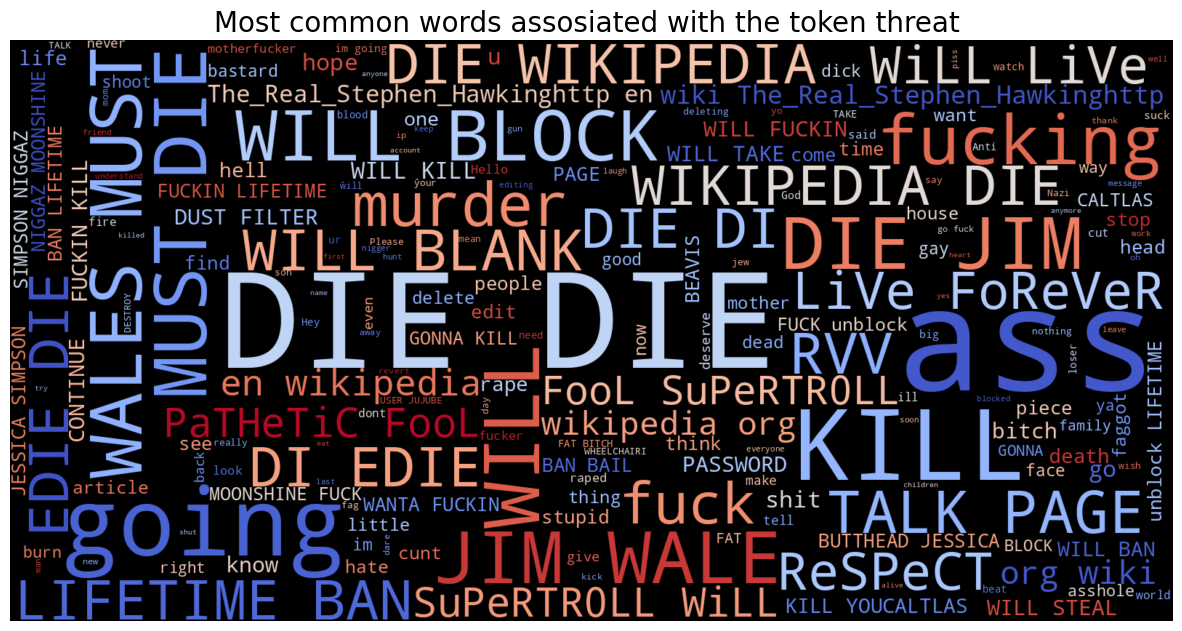

In [ ]:
# enter the label name. > threat
token = input(
    'Choose a class : ')
Word_Cloud(token.lower())

Choose a class : insult


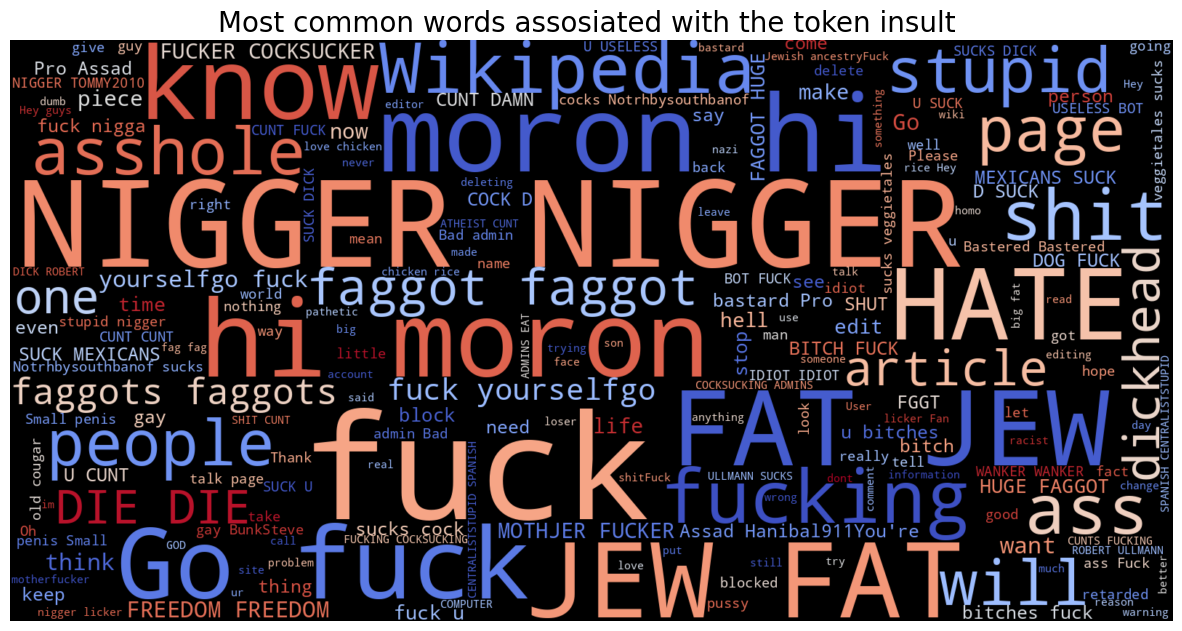

In [ ]:
# enter the label name. > insult
token = input(
    'Choose a class : ')
Word_Cloud(token.lower())

Choose a class : identity_hate


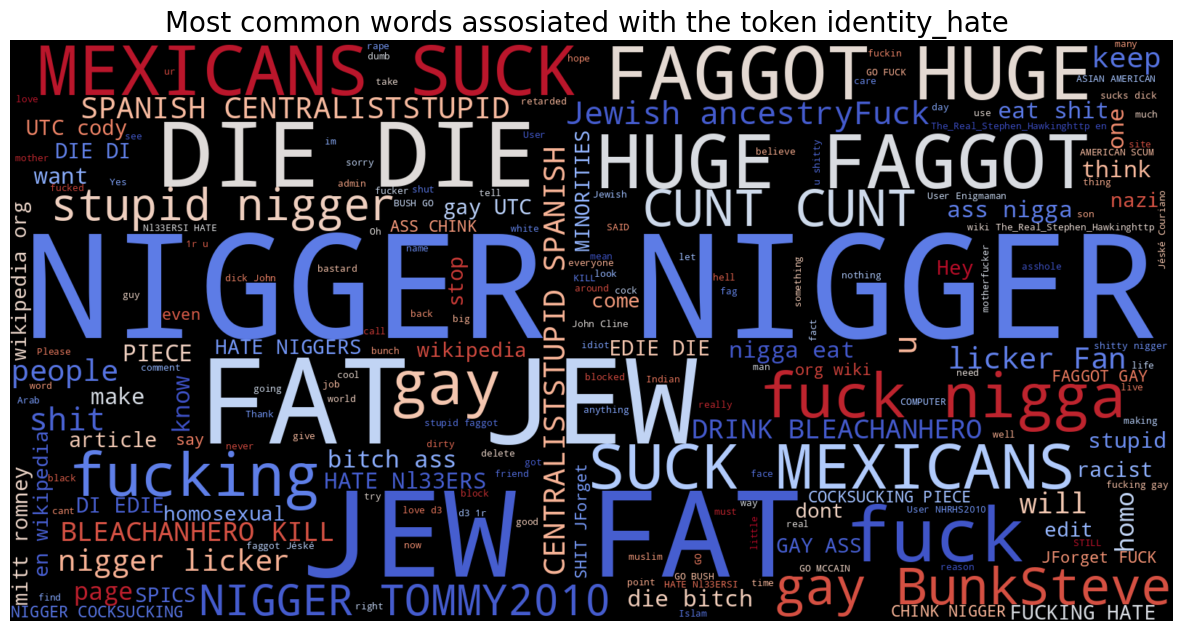

In [ ]:
# enter the label name. > identity_hate
token = input(
    'Choose a class : ')
Word_Cloud(token.lower())

We can see that a toxic comment is associated with the words like s.ck and f.ck, while a threat comment is mostly related with the words d.e, will k.ll, going to k.ll.

For identity_hate we see nationalities and specific groups based on their religion, ethnicity, sexual orientation, or gender identity.